In [6]:
%matplotlib inline

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as p

p.rc('font', size=18)          # controls default text sizes
p.rc('axes', titlesize=20)     # fontsize of the axes title
p.rc('axes', labelsize=20)    # fontsize of the x and y labels
p.rc('xtick', labelsize=18)    # fontsize of the tick labels
p.rc('ytick', labelsize=18)    # fontsize of the tick labels
p.rc('legend', fontsize=20)    # legend fontsize
p.rc('figure', titlesize=12) 

In [9]:
df = pd.read_csv('smartBFT-bench.csv')

df.rename(columns={'Txns in block': 'Block Size', 'Nodes': 'Cluster Size'}, inplace=True)

lanRaft = df[(df['Setup']=='LAN') & (df['Type']=='Raft')]
lanBFT = df[(df['Setup']=='LAN')  & (df['Type']=='BFT')]
wanRaft = df[(df['Setup']=='WAN') & (df['Type']=='Raft')]
wanBFT = df[(df['Setup']=='WAN')  & (df['Type']=='BFT')]

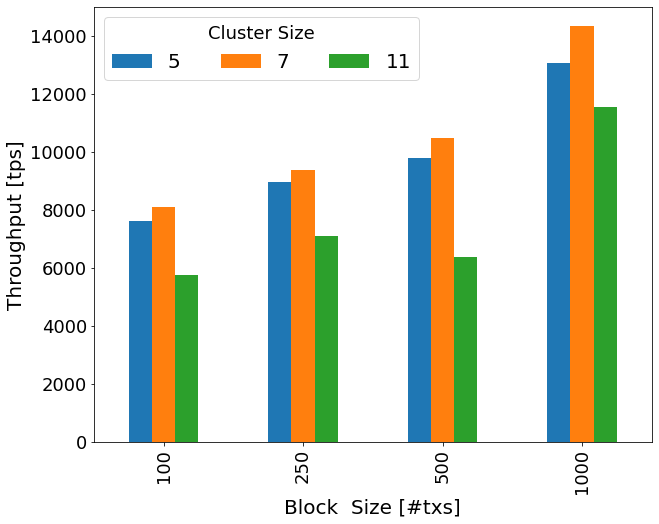

In [10]:
plt = pd.pivot_table(lanRaft, index=["Cluster Size","Block Size"],values=["TPS"]).unstack(0)['TPS'].plot(figsize=(10, 8), style=['bs-','go-','r^-'], kind='bar')
plt.set_ylabel('Throughput [tps]')
plt.set_xlabel('Block  Size [#txs]')
plt.set_ylim(0, 15000)
plt.legend(loc='upper left', title='Cluster Size', fancybox=True, ncol=3)
plt.get_figure().savefig('lan_raft.png')

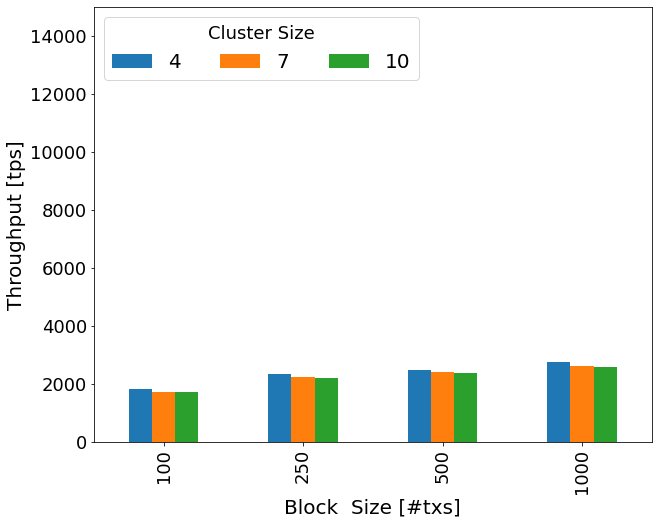

In [11]:
plt = pd.pivot_table(lanBFT, index=["Cluster Size","Block Size"],values=["TPS"]).unstack(0)['TPS'].plot(figsize=(10, 8),  style=['bs-','go-','r^-'], kind='bar')
plt.set_ylabel('Throughput [tps]')
plt.set_xlabel('Block  Size [#txs]')
plt.set_ylim(0, 15000)
plt.legend(loc='upper left', title='Cluster Size', fancybox=True, ncol=3)
plt.get_figure().savefig('lan_bft.png')

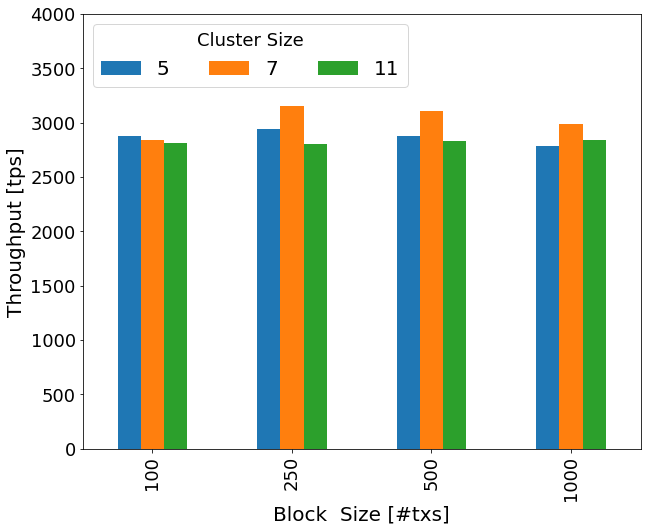

In [12]:
plt = pd.pivot_table(wanRaft, index=["Cluster Size","Block Size"],values=["TPS"]).unstack(0)['TPS'].plot(figsize=(10, 8), style=['bs-','go-','r^-'], kind='bar')
plt.set_ylabel('Throughput [tps]')
plt.set_xlabel('Block  Size [#txs]')
plt.set_ylim(0, 4000)
plt.legend(loc='upper left', title='Cluster Size', fancybox=True, ncol=3)
plt.get_figure().savefig('wan_raft.png')

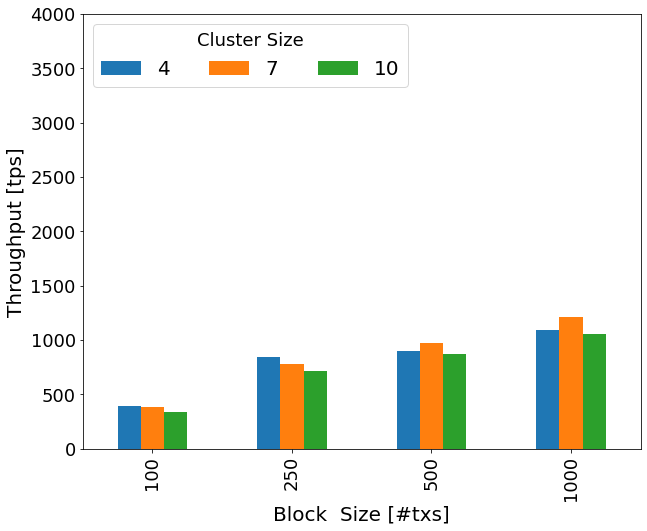

In [13]:
plt = pd.pivot_table(wanBFT, index=["Cluster Size","Block Size"],values=["TPS"]).unstack(0)['TPS'].plot(figsize=(10, 8), style=['bs-','go-','r^-'], kind='bar')
plt.set_ylabel('Throughput [tps]')
plt.set_xlabel('Block  Size [#txs]')
plt.set_ylim(0, 4000)
plt.legend(loc='upper left', title='Cluster Size', fancybox=True, ncol=3)
plt.get_figure().savefig('wan_bft.png')

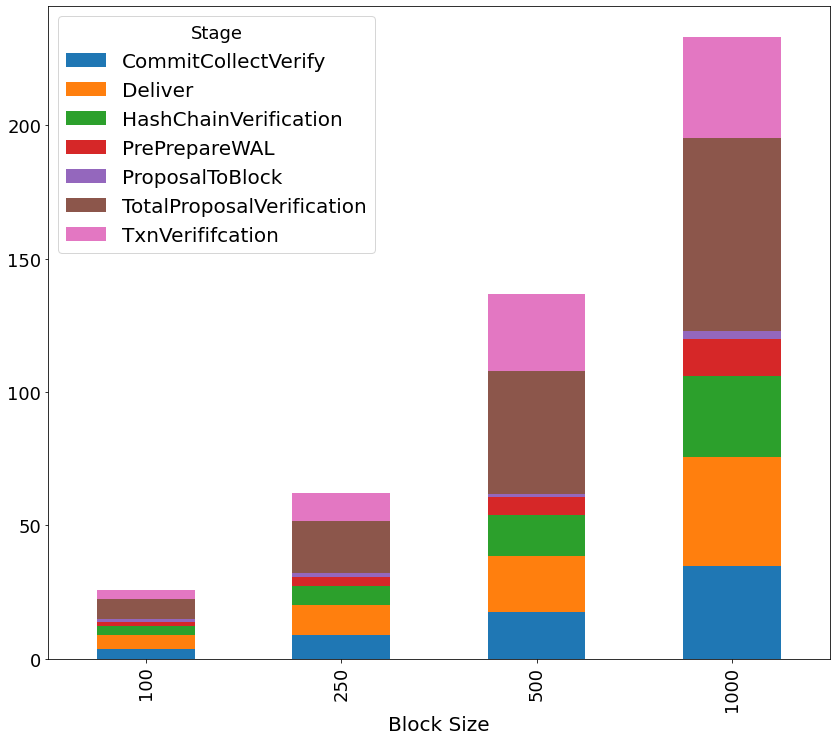

In [14]:
times = pd.read_csv('times.csv')
plt = pd.pivot_table(times[times['Cluster Size']==4], index=["Stage", "Block Size"],values=["Time"]).unstack(0)['Time'].plot(kind='bar', figsize=(14, 12), stacked=True)
plt.get_figure().savefig('bft_stages_4.png')

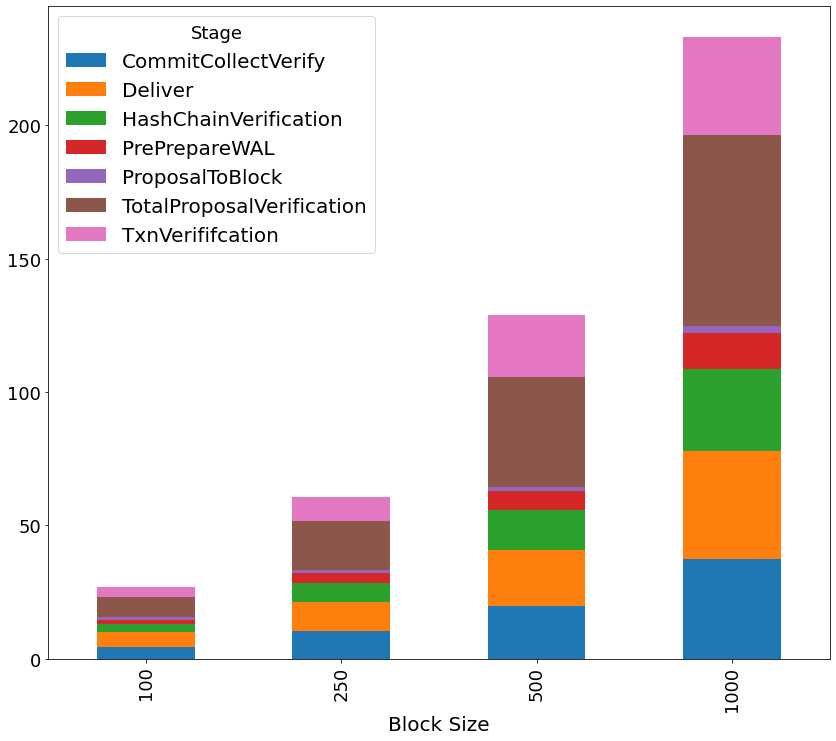

In [15]:
times = pd.read_csv('times.csv')
pd.pivot_table(times[times['Cluster Size']==7], index=["Stage", "Block Size"],values=["Time"]).unstack(0)['Time'].plot(kind='bar', figsize=(14, 12), stacked=True)
plt.get_figure().savefig('bft_stages_7.png')

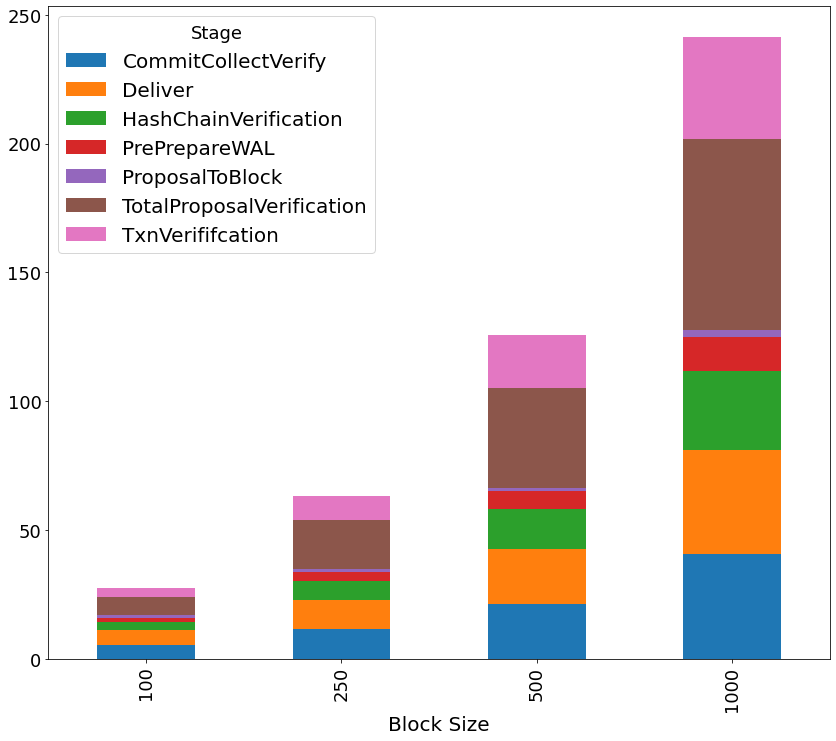

In [16]:
times = pd.read_csv('times.csv')
pd.pivot_table(times[times['Cluster Size']==10], index=["Stage", "Block Size"],values=["Time"]).unstack(0)['Time'].plot(kind='bar', figsize=(14, 12), stacked=True)
plt.get_figure().savefig('bft_stages_10.png')

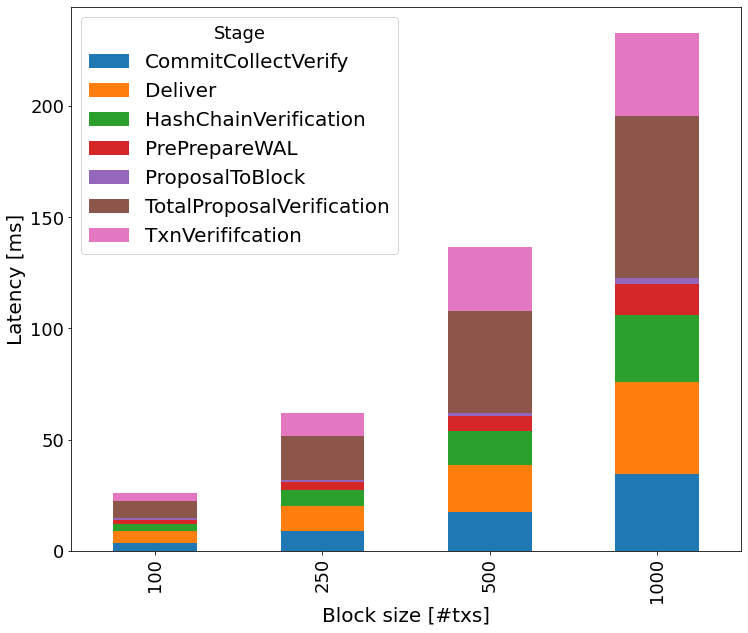

In [17]:
plt = pd.pivot_table(times[times['Cluster Size']==4], index=["Stage", "Block Size"],values=["Time"]).unstack(0)['Time'].plot(kind='bar', figsize=(12, 10), stacked=True)
plt.set_ylabel('Latency [ms]')
plt.set_xlabel('Block size [#txs]')
plt.get_figure().savefig('bft_stages_4.png', dpi=96)

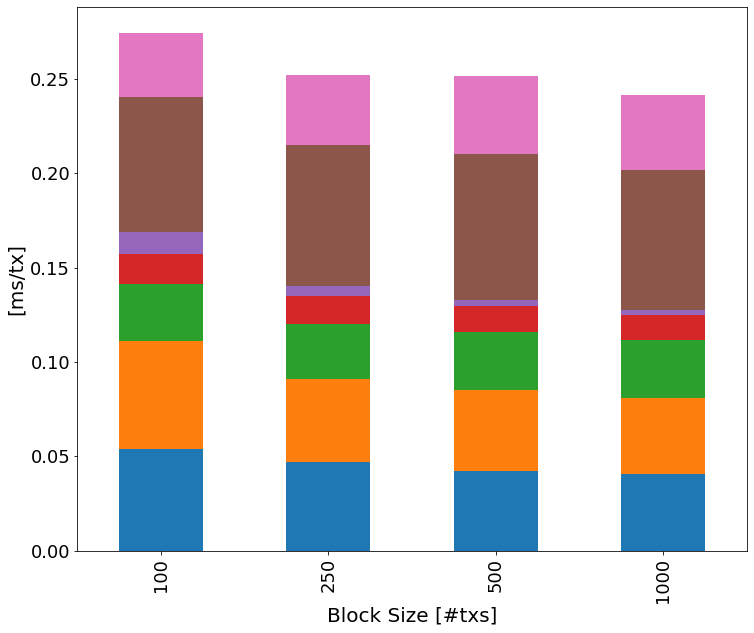

In [18]:
times = pd.read_csv('times.csv')
times['normalized'] = times['Time'] / times['Block Size']
plt = pd.pivot_table(times[times['Cluster Size']==10], index=["Stage","Block Size"],values=["normalized"]).unstack(0)['normalized'].plot(kind='bar', legend=None, figsize=(12, 10), stacked=True)
plt.set_ylabel('[ms/tx]')
plt.set_xlabel('Block Size [#txs]')
plt.get_figure().savefig('bft_ms_txns_normalized.png', dpi=96)

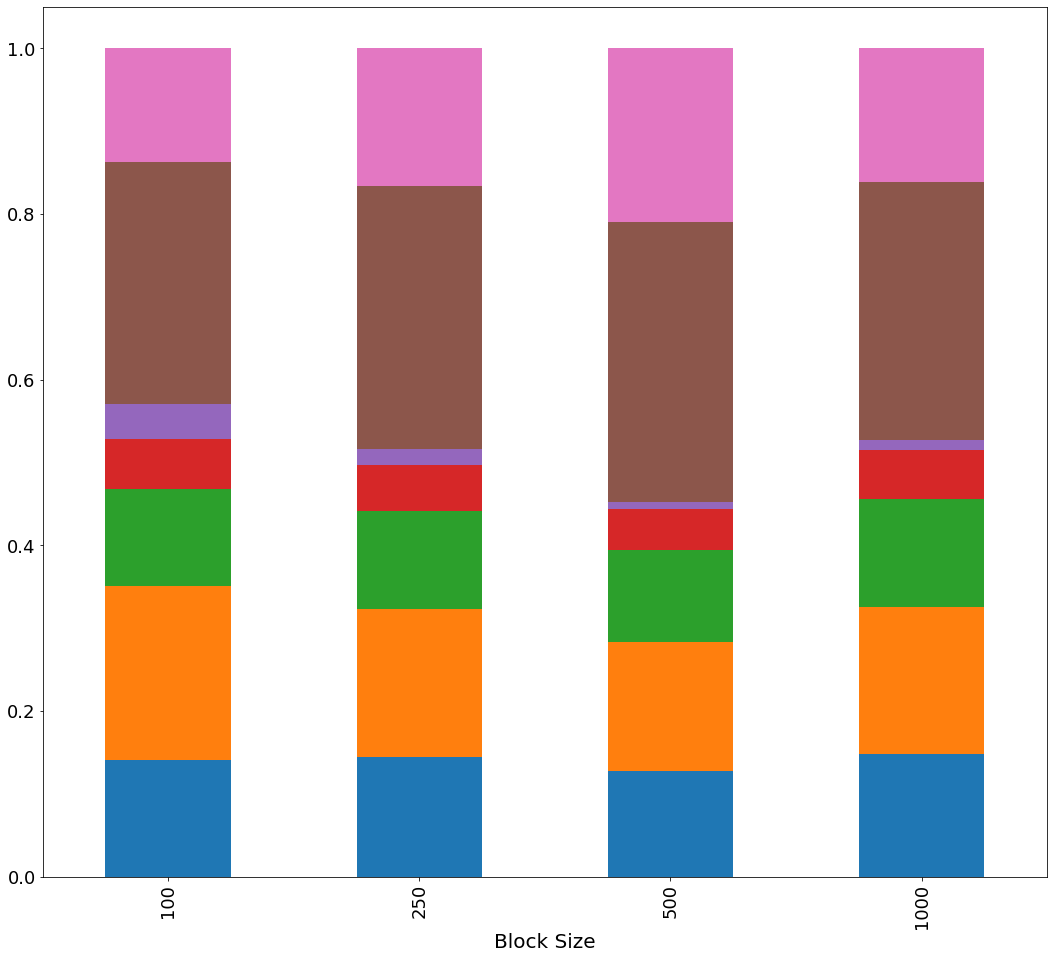

In [19]:
times = pd.read_csv('times.csv')
times = times[times['Cluster Size']==4]
times = times.loc[:, ['Stage', 'Block Size', 'Time']]
s = times.groupby(['Stage', 'Block Size']).mean().unstack(1).sum()
plt = times.groupby(['Stage', 'Block Size']).mean().unstack(1).div(s)['Time'].transpose().plot(kind='bar', stacked=True, figsize=(18,16), legend=None)


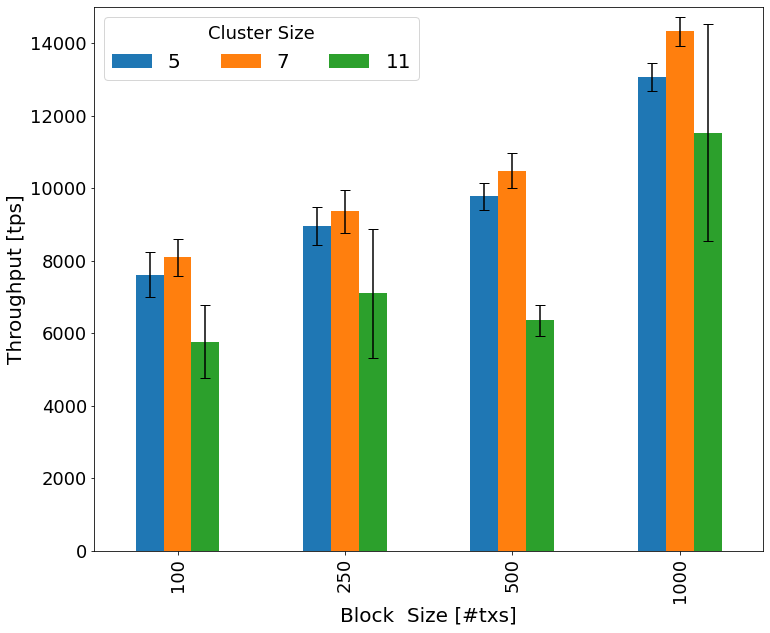

In [90]:
import numpy as np
plt = lanRaft.groupby(["Cluster Size","Block Size"]).agg([np.mean, np.std]).unstack(0)['TPS'].plot(figsize=(12, 10), style=['bs-','go-','r^-'], kind='bar', yerr='std', y='mean', capsize=5)
plt.set_ylabel('Throughput [tps]')
plt.set_xlabel('Block  Size [#txs]')
plt.set_ylim(0, 15000)
plt.legend(loc='upper left', title='Cluster Size', fancybox=True, ncol=3)
plt.get_figure().savefig('lan_raft.png')

In [91]:
plt = lanBFT.groupby(["Cluster Size","Block Size"]).agg([np.mean, np.std]).unstack(0)['TPS'].plot(figsize=(12, 10), style=['bs-','go-','r^-'], kind='bar', yerr='std', y='mean', capsize=5)
plt.set_ylabel('Throughput [tps]')
plt.set_xlabel('Block  Size [#txs]')
plt.set_ylim(0, 15000)
plt.legend(loc='upper left', title='Cluster Size', fancybox=True, ncol=3)
plt.get_figure().savefig('lan_bft.png')

In [92]:
plt = wanRaft.groupby(["Cluster Size","Block Size"]).agg([np.mean, np.std]).unstack(0)['TPS'].plot(figsize=(12, 10), style=['bs-','go-','r^-'], kind='bar', yerr='std', y='mean', capsize=5)
plt.set_ylabel('Throughput [tps]')
plt.set_xlabel('Block  Size [#txs]')
plt.set_ylim(0, 4000)
plt.legend(loc='upper left', title='Cluster Size', fancybox=True, ncol=3)
plt.get_figure().savefig('wan_raft.png')

In [94]:
plt = wanBFT.groupby(["Cluster Size","Block Size"]).agg([np.mean, np.std]).unstack(0)['TPS'].plot(figsize=(12, 10), style=['bs-','go-','r^-'], kind='bar', yerr='std', y='mean', capsize=5)
plt.set_ylabel('Throughput [tps]')
plt.set_xlabel('Block  Size [#txs]')
plt.set_ylim(0, 4000)
plt.legend(loc='upper left', title='Cluster Size', fancybox=True, ncol=3)
plt.get_figure().savefig('wan_bft.png')